In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import pandas_datareader as web
%matplotlib inline

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
esg_csv = Path("/Users/alhamduliallah/Downloads/esg_stock_data.csv")
sin_csv = Path("/Users/alhamduliallah/Downloads/sin_stock_data.csv")

In [ ]:
esg_df = pd.read_csv(esg_csv, infer_datetime_format=True, parse_dates=True)
sin_df = pd.read_csv(sin_csv, infer_datetime_format=True, parse_dates=True)

In [ ]:
esg_df = esg_df.rename(columns={"Unnamed: 0": "Dates"})
sin_df = sin_df.rename(columns={"Unnamed: 0": "Dates"})

In [ ]:
esg_df['Dates'] = pd.to_datetime(esg_df['Dates'], utc=True).dt.date
sin_df['Dates'] = pd.to_datetime(sin_df['Dates'], utc = True).dt.date

In [ ]:
esg_df = esg_df.set_index("Dates")
sin_df = sin_df.set_index("Dates")

In [ ]:
price_data = web.get_data_yahoo(esg_df.columns,
                               start = '2008-01-02',
                               end = '2020-10-30')

In [ ]:
sin_price_data = web.get_data_yahoo(sin_df.columns,
                               start = '2008-01-02',
                               end = '2020-10-30')

In [ ]:
esg_price_data = price_data["Adj Close"]

In [ ]:
sin_price_data = sin_price_data["Adj Close"]

In [2]:
sin_price_data = sin_price_data.dropna()

NameError: name 'sin_price_data' is not defined

In [31]:
esg_daily_returns = esg_price_data.pct_change().dropna()

In [40]:
sin_daily_returns = sin_price_data.pct_change().dropna()

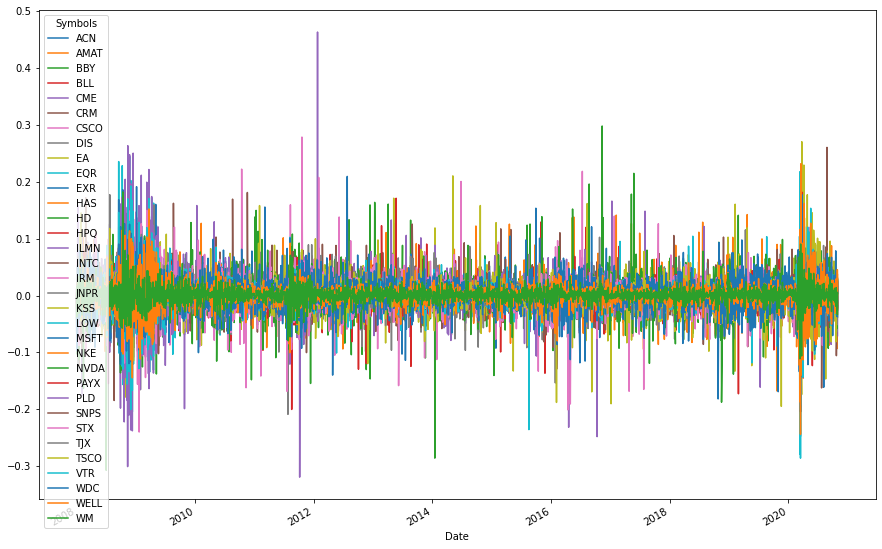

In [41]:
esg_daily_returns.plot(figsize= (15,10))

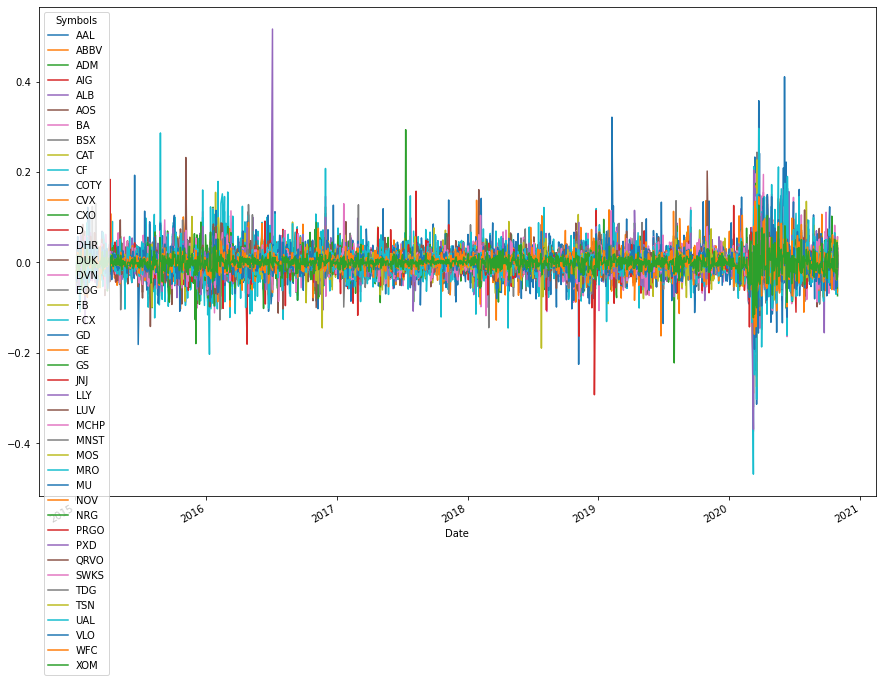

In [42]:
sin_daily_returns.plot(figsize=(15,10))

In [ ]:
esg_price_data.to_csv("Resources/esg_price_data.csv")
sin_price_data.to_csv("Resources/sin_price_data.csv")
esg_daily_returns.to_csv("Resources/esg_daily_returns.csv")
sin_daily_returns.to_csv("Resources/sin_daily_returns.csv")